# DECISION TREE

# 1. Data Preparation:

In [2]:
import pandas as pd

In [4]:
df_sheets = pd.read_excel("heart_disease.xlsx", sheet_name=None, engine="openpyxl")  
df_sheets.keys()

dict_keys(['Description', 'Heart_disease'])

In [5]:

Data = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease", engine="openpyxl")
Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


# 2. Exploratory Data Analysis (EDA):

In [8]:
Data.shape

(908, 13)

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [12]:
Data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [16]:
Data.oldpeak.unique()

array([ 2.3,  0. ,  0.4,  1.5,  1. ,  nan,  2.6,  0.5,  1.2,  3.5,  1.4,
        1.1,  0.6,  2. ,  1.6,  0.1,  0.3,  1.3,  0.2,  2.4,  1.8,  3. ,
        0.8,  1.9,  0.9,  0.7,  4.2, -0.5, -0.1, -1.1,  2.1,  3.6,  1.7,
        3.1,  2.2,  2.5,  2.8, -1.5, -0.9, -2.6, -0.8,  4. ,  5. , -1. ,
        3.4, -2. , -0.7,  3.2,  6.2,  5.6,  2.9,  3.7,  4.4,  3.8])

In [18]:
Data[Data.isnull().any(axis = 1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0
371,55,Male,atypical angina,110,214,True,st-t abnormality,180,False,NaN,flat,normal,0
380,69,Male,non-anginal,175,271,False,lv hypertrophy,82,FALSE,NaN,upsloping,reversable defect,0
381,51,Male,asymptomatic,133,218,True,lv hypertrophy,156,TURE,NaN,upsloping,reversable defect,0
382,58,Male,asymptomatic,131,385,True,lv hypertrophy,126,TURE,NaN,flat,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,69,Male,asymptomatic,154,289,True,st-t abnormality,128,TURE,NaN,flat,fixed defect,3
878,64,Male,asymptomatic,134,306,True,st-t abnormality,73,TURE,NaN,upsloping,reversable defect,3
879,60,Male,non-anginal,186,316,True,st-t abnormality,70,TURE,NaN,flat,fixed defect,3
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [20]:
Data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [22]:
Mean = Data['oldpeak'].mean()
Mean

0.8912529550827422

In [24]:
Data.loc[:,'oldpeak'] = Data['oldpeak'].fillna(Mean)

In [26]:
Data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [28]:
Data[Data.duplicated(keep = False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [30]:
Data = Data.drop_duplicates()

In [32]:
Data[Data.duplicated(keep = False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


In [34]:
Data.shape

(907, 13)

In [36]:
Data.reset_index(inplace = True)

In [38]:
Data

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect,4
903,904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect,4
904,905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal,4
905,906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect,4


In [40]:
Data = Data.drop(['index'], axis = 1)
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


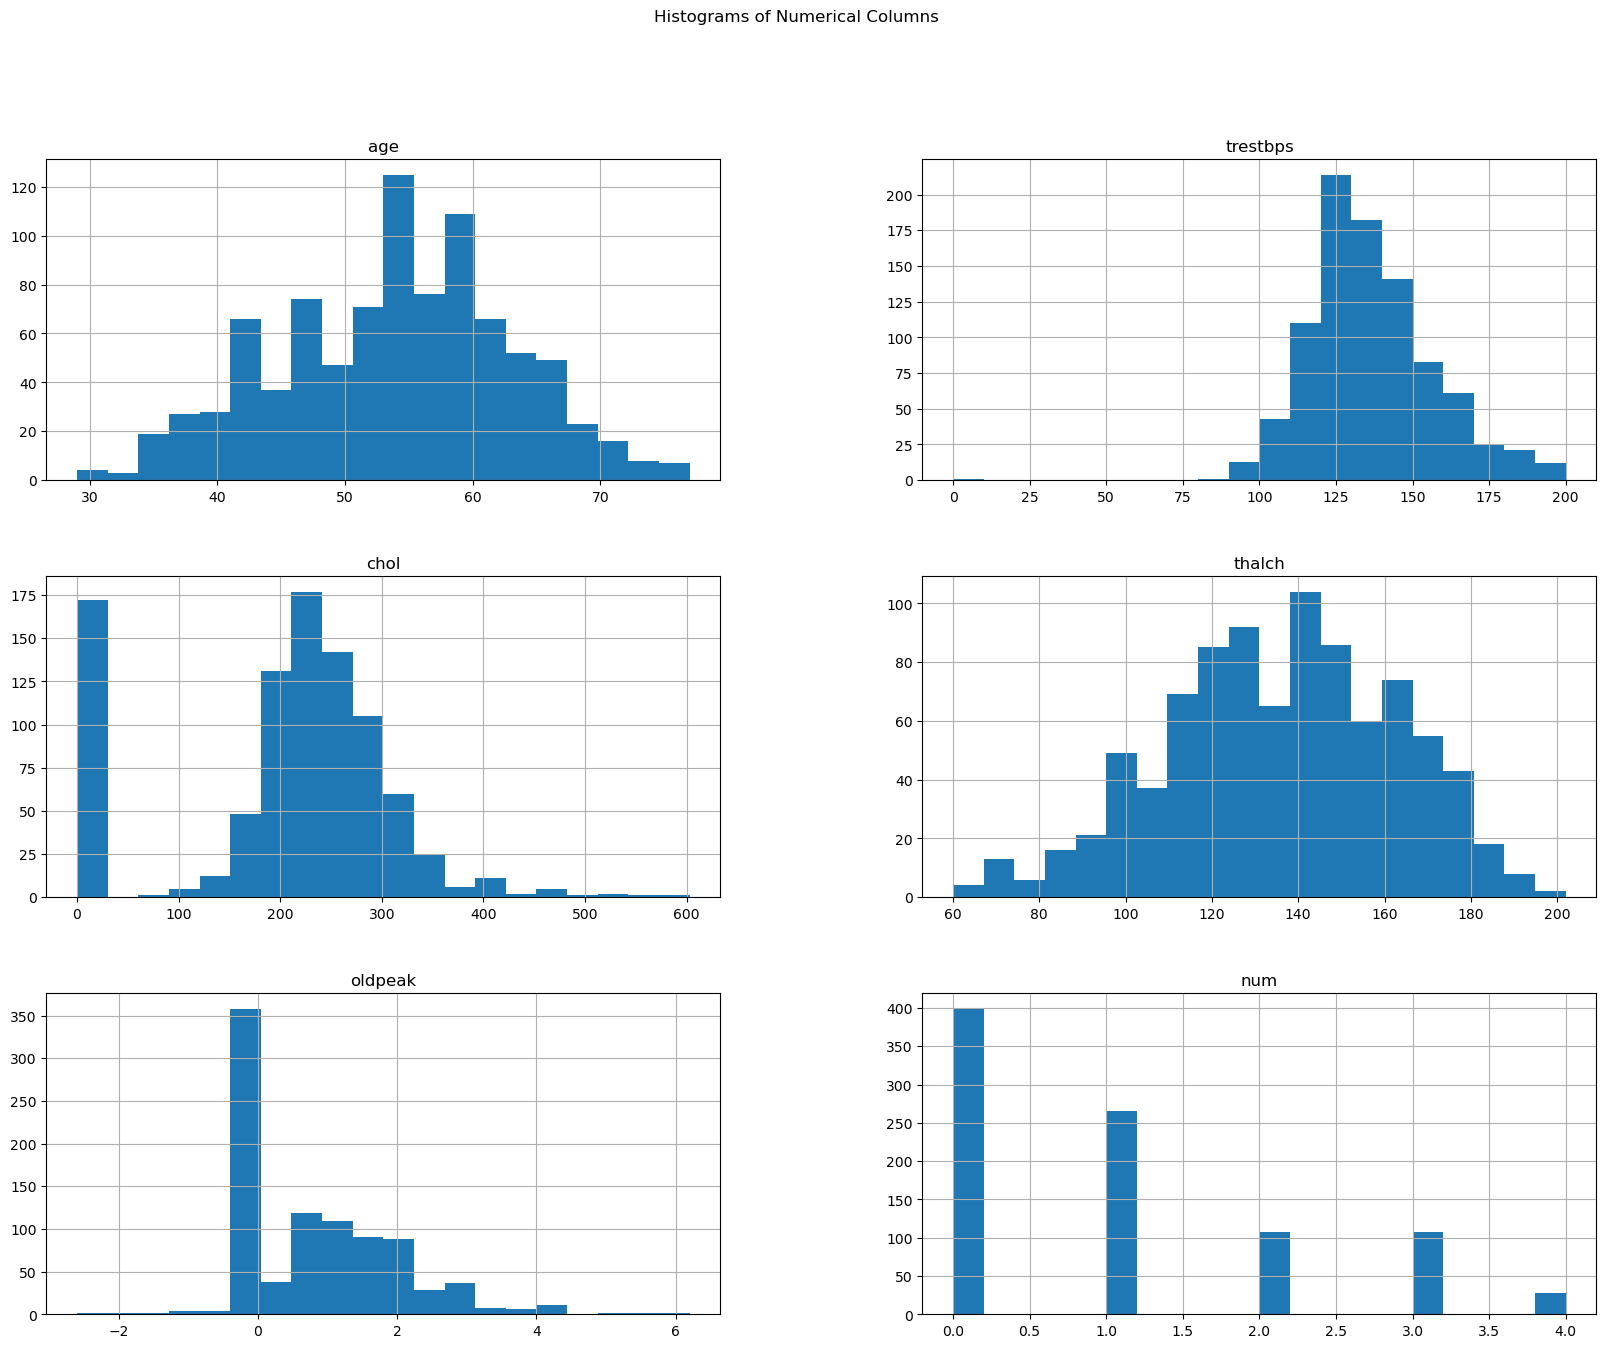

In [42]:
import matplotlib.pyplot as plt
Data.hist(bins = 20, figsize = (20,15))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

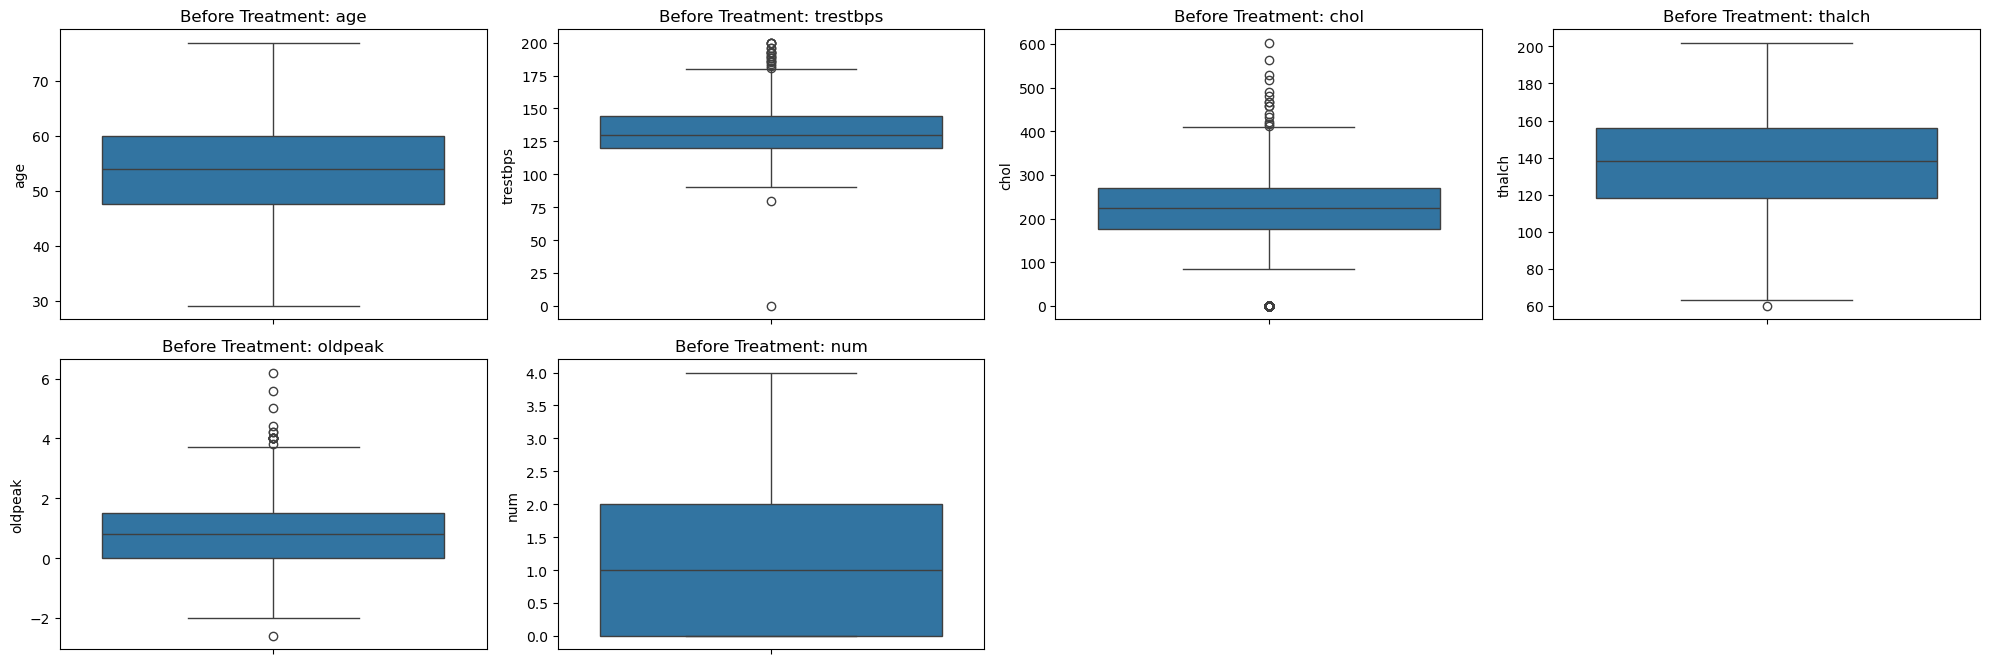

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = ['age', 'trestbps', 'chol',  'thalch', 'oldpeak', 'num']

# Function to detect and treat outliers using IQR
def treat_outliers_iqr(Data, column):
    Q1 = Data[column].quantile(0.25)
    Q3 = Data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    Data[column] = np.where(Data[column] < lower_bound, lower_bound, Data[column])
    Data[column] = np.where(Data[column] > upper_bound, upper_bound, Data[column])
    return Data

# Visualize outliers before treatment
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=Data[col])
    plt.title(f'Before Treatment: {col}')
plt.tight_layout()
plt.show()

# 

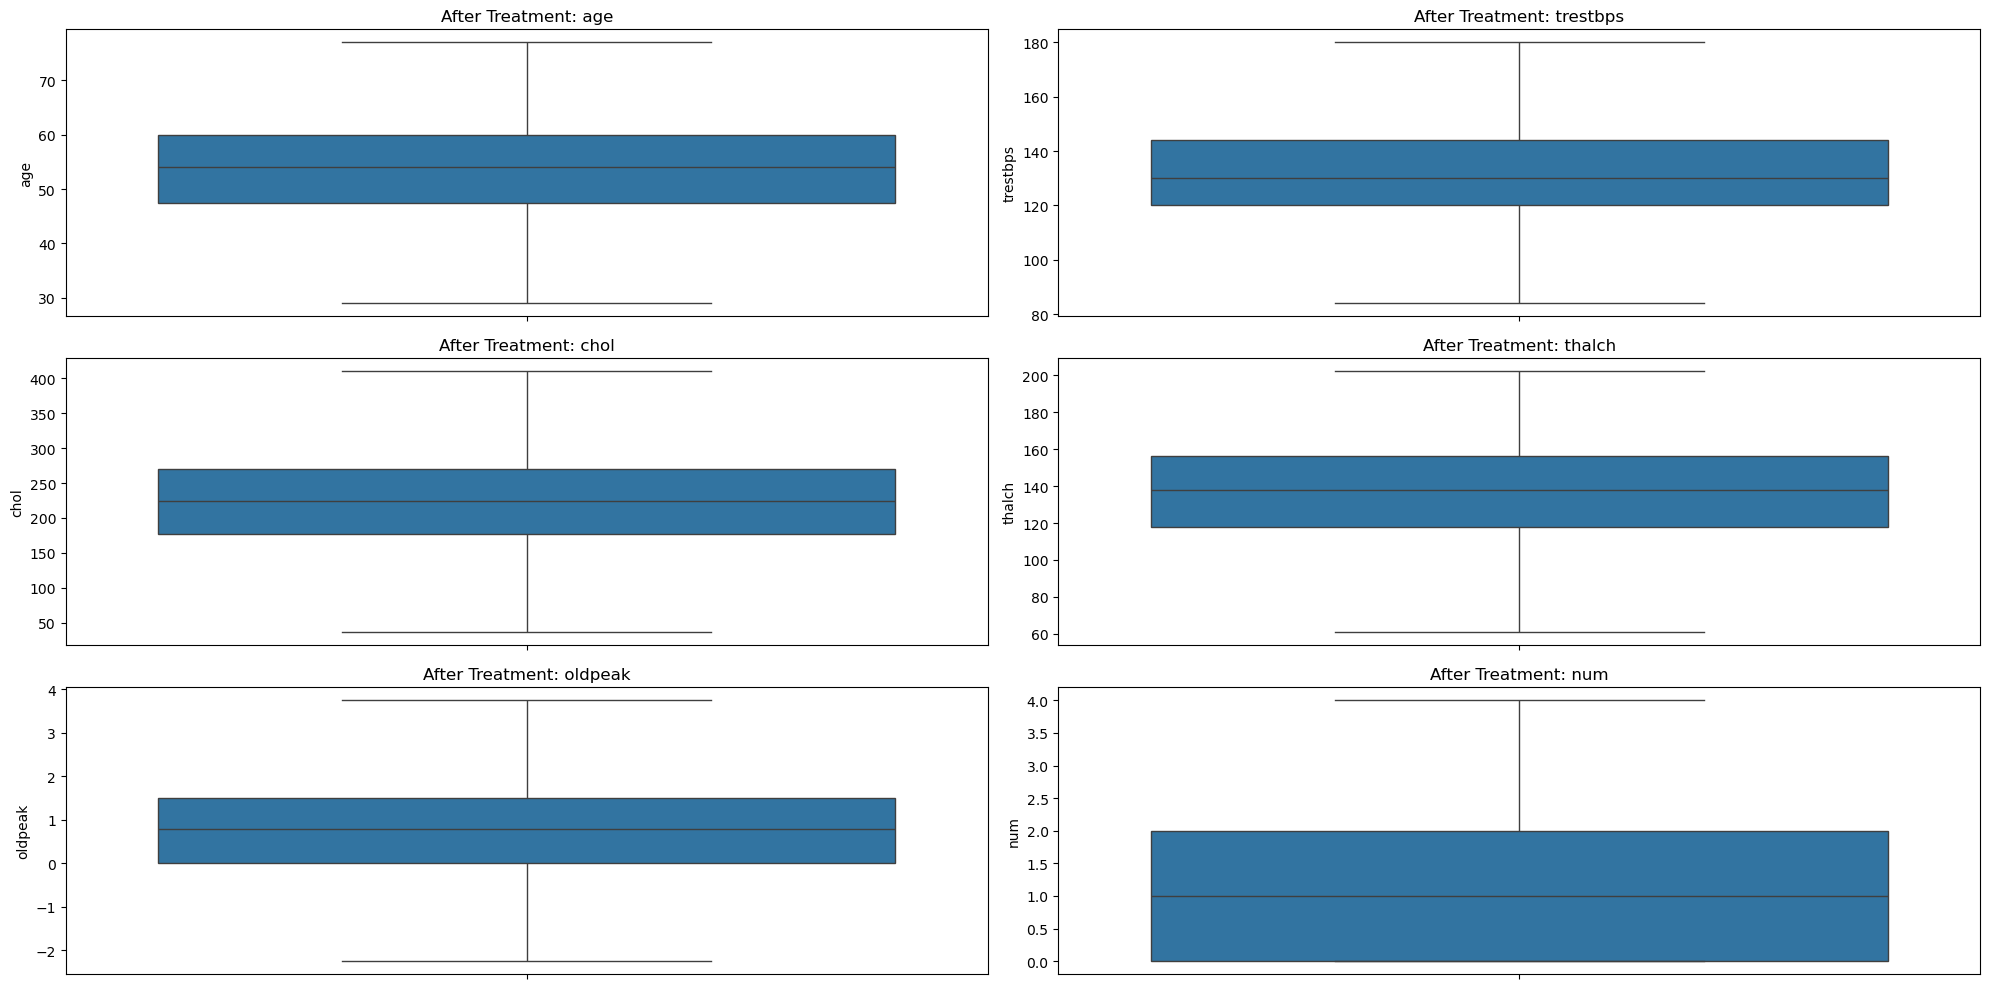

In [45]:
#Treat outliers for all numerical columns
for col in numerical_cols:
    Data = treat_outliers_iqr(Data, col)

# Visualize outliers after treatment
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=Data[col])
    plt.title(f'After Treatment: {col}')
plt.tight_layout()
plt.show()


In [48]:
df_num = Data.select_dtypes('number')
df_num.corr(method=('pearson'))

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.261741,-0.092618,-0.327919,0.236649,0.326227
trestbps,0.261741,1.000000,0.126318,-0.131224,0.159640,0.141934
chol,-0.092618,0.126318,1.000000,0.194884,0.030649,-0.228771
thalch,-0.327919,-0.131224,0.194884,1.000000,-0.132703,-0.322633
oldpeak,0.236649,0.159640,0.030649,-0.132703,1.000000,0.418056
num,0.326227,0.141934,-0.228771,-0.322633,0.418056,1.000000


<Axes: >

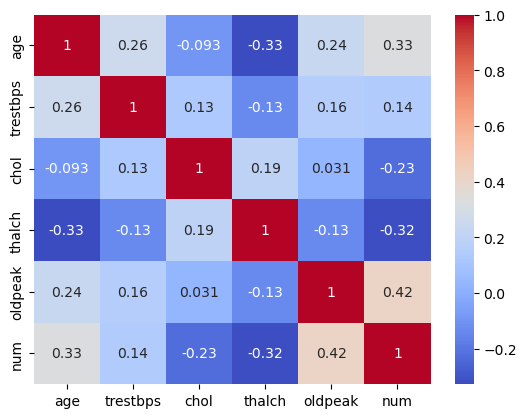

In [50]:
sns.heatmap(df_num.corr(),annot=True,cmap="coolwarm")

# 3. Feature Engineering:

In [53]:
Data = pd.get_dummies(Data,columns=['sex'], drop_first = True)

In [55]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    float64
 1   cp        907 non-null    object 
 2   trestbps  907 non-null    float64
 3   chol      907 non-null    float64
 4   fbs       907 non-null    bool   
 5   restecg   907 non-null    object 
 6   thalch    907 non-null    float64
 7   exang     907 non-null    object 
 8   oldpeak   907 non-null    float64
 9   slope     907 non-null    object 
 10  thal      907 non-null    object 
 11  num       907 non-null    float64
 12  sex_Male  907 non-null    bool   
dtypes: bool(2), float64(6), object(5)
memory usage: 79.8+ KB


In [57]:
Data.num.unique()

array([0., 1., 2., 3., 4.])

In [61]:
Data.loc[:,'exang'] = Data['exang'].replace('TURE', True)
Data.loc[:,'exang'] = Data['exang'].replace('FALSE', False)

In [63]:
 Data.head(5)

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_Male
0,63.0,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0.0,True
1,41.0,atypical angina,135.0,203.0,False,normal,132.0,False,0.0,flat,fixed defect,0.0,True
2,57.0,asymptomatic,140.0,192.0,False,normal,148.0,False,0.4,flat,fixed defect,0.0,True
3,52.0,typical angina,118.0,186.0,False,lv hypertrophy,190.0,False,0.0,flat,fixed defect,0.0,True
4,57.0,asymptomatic,110.0,201.0,False,normal,126.0,True,1.5,flat,fixed defect,0.0,True


In [65]:
Data.exang.unique()

array([False, True], dtype=object)

In [67]:
Data['exang'] = Data['exang'].astype(int)

In [69]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    float64
 1   cp        907 non-null    object 
 2   trestbps  907 non-null    float64
 3   chol      907 non-null    float64
 4   fbs       907 non-null    bool   
 5   restecg   907 non-null    object 
 6   thalch    907 non-null    float64
 7   exang     907 non-null    int32  
 8   oldpeak   907 non-null    float64
 9   slope     907 non-null    object 
 10  thal      907 non-null    object 
 11  num       907 non-null    float64
 12  sex_Male  907 non-null    bool   
dtypes: bool(2), float64(6), int32(1), object(4)
memory usage: 76.3+ KB


In [71]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Data['cp'] = label_encoder.fit_transform(Data['cp'])
Data['restecg'] = label_encoder.fit_transform(Data['restecg'])
Data['thal'] = label_encoder.fit_transform(Data['thal'])
Data['slope'] = label_encoder.fit_transform(Data['slope'])
Data.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_Male
0,63.0,3,145.0,233.0,True,0,150.0,0,2.3,0,0,0.0,True
1,41.0,1,135.0,203.0,False,1,132.0,0,0.0,1,0,0.0,True
2,57.0,0,140.0,192.0,False,1,148.0,0,0.4,1,0,0.0,True
3,52.0,3,118.0,186.0,False,0,190.0,0,0.0,1,0,0.0,True
4,57.0,0,110.0,201.0,False,1,126.0,1,1.5,1,0,0.0,True


In [73]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    float64
 1   cp        907 non-null    int32  
 2   trestbps  907 non-null    float64
 3   chol      907 non-null    float64
 4   fbs       907 non-null    bool   
 5   restecg   907 non-null    int32  
 6   thalch    907 non-null    float64
 7   exang     907 non-null    int32  
 8   oldpeak   907 non-null    float64
 9   slope     907 non-null    int32  
 10  thal      907 non-null    int32  
 11  num       907 non-null    float64
 12  sex_Male  907 non-null    bool   
dtypes: bool(2), float64(6), int32(5)
memory usage: 62.1 KB


# 4. Decision Tree Classification:

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import tree

In [78]:
X = Data.drop('num', axis=1)
y = Data['num']

In [80]:
X.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,sex_Male
0,63.0,3,145.0,233.0,True,0,150.0,0,2.3,0,0,True
1,41.0,1,135.0,203.0,False,1,132.0,0,0.0,1,0,True
2,57.0,0,140.0,192.0,False,1,148.0,0,0.4,1,0,True
3,52.0,3,118.0,186.0,False,0,190.0,0,0.0,1,0,True
4,57.0,0,110.0,201.0,False,1,126.0,1,1.5,1,0,True


In [82]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: num, dtype: float64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [86]:
print(X_train.shape,X_test.shape,y_train.shape,y_train.shape)

(725, 12) (182, 12) (725,) (725,)


In [88]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

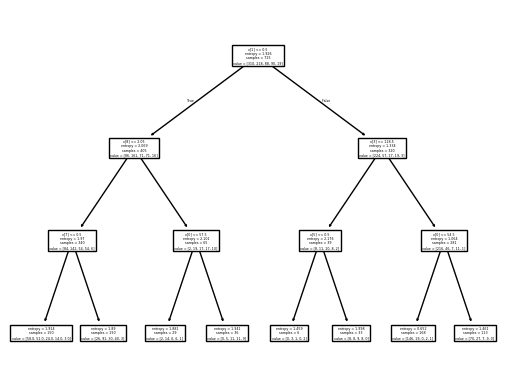

In [90]:
tree.plot_tree(model);

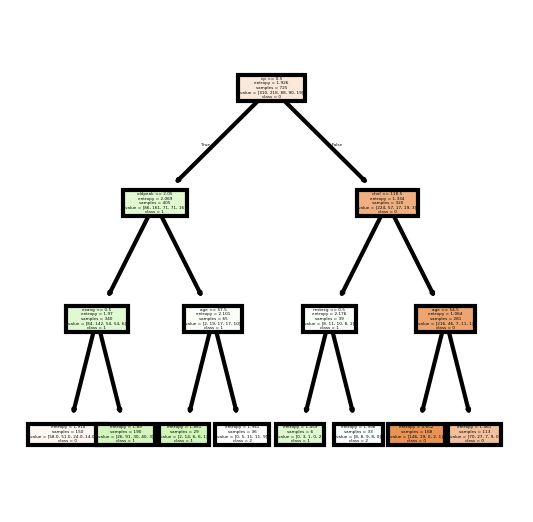

In [92]:
fn = ['age','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal','sex_Male']
cn = ['0','1','2','3','4']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (2,2),  dpi =300)
tree.plot_tree(model,feature_names  = fn,class_names = cn, filled = True);

In [94]:
preds = model.predict(X_test)
pd.Series(preds).value_counts()

0.0    118
1.0     52
2.0     12
Name: count, dtype: int64

In [96]:
preds

array([0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 2., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 2., 0., 1., 0., 2., 1., 0., 2., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 2.,
       0., 1., 0., 1., 0., 1., 1., 0., 2., 0., 1., 2., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       2., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 2., 2., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.])

In [98]:
y_test

868    3.0
439    1.0
342    0.0
735    2.0
784    3.0
      ... 
598    1.0
867    3.0
445    1.0
785    3.0
25     0.0
Name: num, Length: 182, dtype: float64

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds, zero_division = 1))
# zero_division=1: Assigns precision as 1 (useful if missing predictions are expected).
# zero_division=0: Assigns precision as 0 (strict, use for debugging).

              precision    recall  f1-score   support

         0.0       0.65      0.87      0.74        89
         1.0       0.46      0.51      0.48        47
         2.0       0.25      0.15      0.19        20
         3.0       1.00      0.00      0.00        17
         4.0       1.00      0.00      0.00         9

    accuracy                           0.57       182
   macro avg       0.67      0.31      0.28       182
weighted avg       0.61      0.57      0.51       182



In [102]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [104]:
y_pred = dt_classifier.predict(X_test)

In [106]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test), multi_class='ovr')

In [108]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.5054945054945055
Precision: 0.5358775810500348
Recall: 0.5054945054945055
F1-Score: 0.5119015377339462
ROC-AUC: 0.6028354520888496


# 5. Hyperparameter Tuning:

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']  # Updated
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
Test Set Accuracy: 0.5714285714285714


In [ ]:
fn = ['age','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal','sex_Male']
cn = ['0','1','2','3','4']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (2,2),  dpi =300)
tree.plot_tree(model,feature_names  = fn,class_names = cn, filled = True);

In [ ]:
# Interview Questions: